# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Introduction to Plotting

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. 

#### Background reading: 
- Statistics, Data Mining, and Machine Learning in Astronomy (SDMLA), Chapter 1

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy
import sys, os

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [2]:
def func8(x):
    return 1./(x*x + x*x*x)

def func9(x):
    return np.power(np.sin(x),2)/np.power(x,2)

### Create a simple plot

Text(0, 0.5, 'Y')

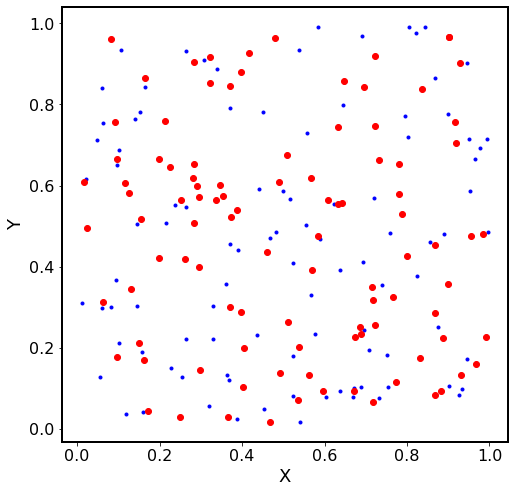

In [10]:
# Generate 100 random points on the interval (0,1)
np.random.seed(1216)
N = 100
bx = np.random.rand(N)
by = np.random.rand(N)
rx = np.random.rand(N)
ry = np.random.rand(N)

# Draw points of one color, circles of another
plt.figure(figsize=(8,8))
plt.plot(bx, by, 'b.')
plt.plot(rx, ry, 'ro')
plt.xlabel("X")
plt.ylabel("Y")

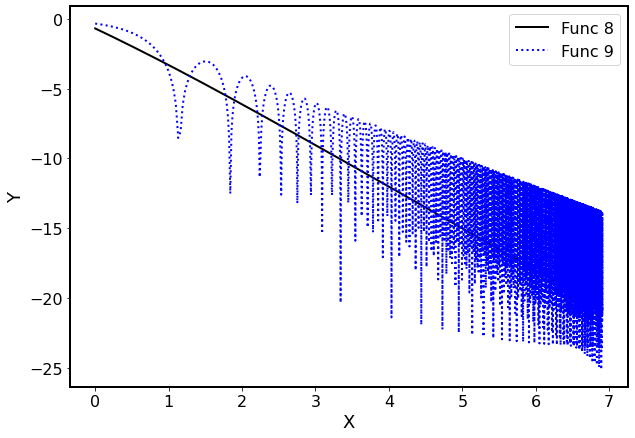

In [11]:
# Draw some plots with different line times based on functions in PS1
x = np.linspace(1,1000, 10000)
y8 = func8(x)
y9 = func9(x)
plt.figure(figsize=(10,7))
plt.plot(np.log(x), np.log(y8), 'k-', label="Func 8")
plt.plot(np.log(x), np.log(y9), "b:", label="Func 9")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

### Plot a Gaussian distribution + histogram

(-5.0, 5.0)

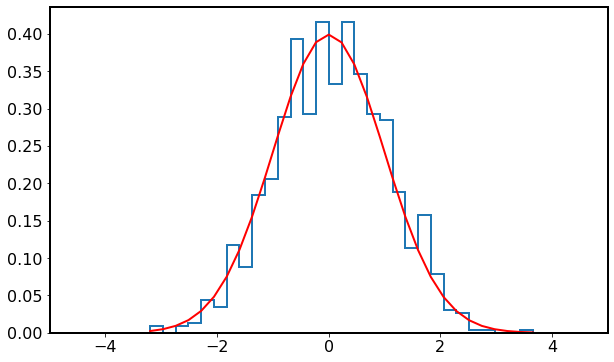

In [30]:
# Here is a simple illustration of a histogram and a Gaussian distribution

def gaussian(x, mu, sigma):
    return 1./(np.sqrt(2.*np.pi)*sigma)*np.exp(-np.power((x - mu)/sigma, 2.)/2)


plt.figure(figsize=(10, 6))
mu, sigma = 0, 1 # mean and standard deviation
g = np.random.normal(mu, sigma, 1000)

# Create a histogram of the random points
count, bins, ignored = plt.hist(g, 30, density=True, histtype='step', lw=2)

# Draw the gaussian
plt.plot(bins, gaussian(bins, mu, sigma), 'r', lw=2)

plt.xlim(-5, 5)

### subplot

This is a simple, multi-panel plot

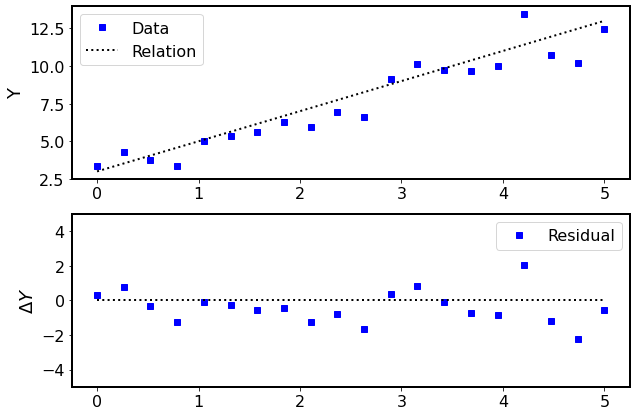

In [29]:
Npts = 20
x = np.linspace(0, 5, Npts)
m = 2
b = 3
y = m*x + b
sig_y = np.random.normal(0, 1, Npts)
fx = y + sig_y

plt.figure(figsize=(10,7))
plt.subplot(211)   # Note syntax is ncols nrols current
plt.plot(x, fx, 'bs', label="Data")
plt.plot(x, y, 'k:', label="Relation")
plt.ylabel("Y")
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(x, fx - y, 'bs', label="Residual")
plt.ylim(-5, 5)
plt.plot( [x[0], x[-1]], [0, 0], 'k:')
plt.ylabel("X")
plt.ylabel(r"$\Delta Y$")
plt.legend(loc='upper right')

### Create a plot with axes

axes can be used to explicitly plan out a figure, and offers greater flexibility for formatting

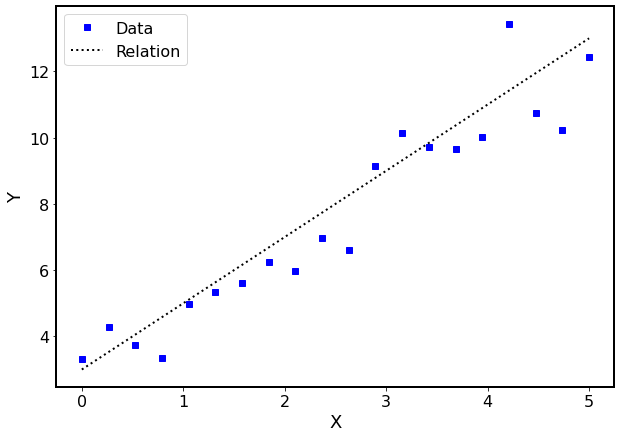

In [32]:
# This is a very simple application of axes
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, fx, 'bs', label="Data")
ax.plot(x, y, 'k:', label="Relation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

### Create a multi-panel plot (subplots)

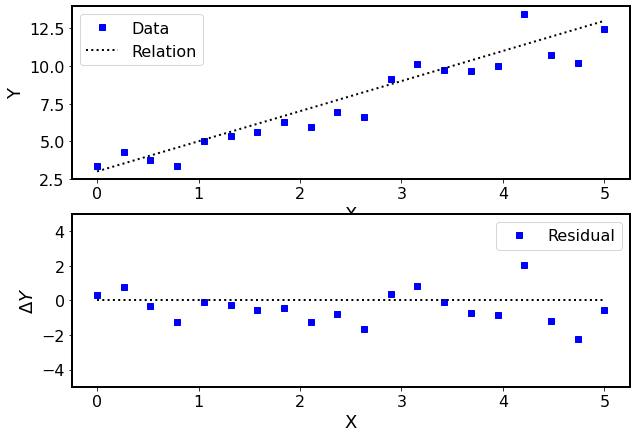

In [39]:
# Here is a slightly more intricate example

fig, axarr = plt.subplots(2, 1, figsize=(10,7))
axarr[0].plot(x, fx, 'bs', label="Data")
axarr[0].plot(x, y, 'k:', label="Relation")
axarr[0].set_xlabel("X")
axarr[0].set_ylabel("Y")
axarr[0].legend()

axarr[1].plot(x, fx - y, 'bs', label="Residual")
axarr[1].set_ylim(-5, 5)
axarr[1].plot( [x[0], x[-1]], [0, 0], 'k:')
axarr[1].set_ylabel(r"$\Delta Y$")
axarr[1].set_xlabel("X")
axarr[1].legend()

### Install astroML and healpix in ".local"

In [41]:
! pip install astroml --user

     |████████████████████████████████| 105 kB 3.0 MB/s eta 0:00:01
  Created wheel for astroml: filename=astroML-0.4.1-py3-none-any.whl size=128664 sha256=cb4f7777774038e04e171c38f733e918cedea2d17f9918875e8f4672acde36be
  Stored in directory: /Users/martini.10/Library/Caches/pip/wheels/c0/66/05/bd5b4f5b8def4b1a8c4f879d4d648d80ee3c8b9649c00ee0b3
Successfully built astroml


In [42]:
! pip install healpy --user

In [10]:
# This is the 'user' installation path for OSC
newpath = os.path.join( os.getenv("HOME"), ".local/lib/python3.7/site-packages/")
sys.path.append(newpath)

In [43]:
import astroML

### Figure 1.1 from SDMLA

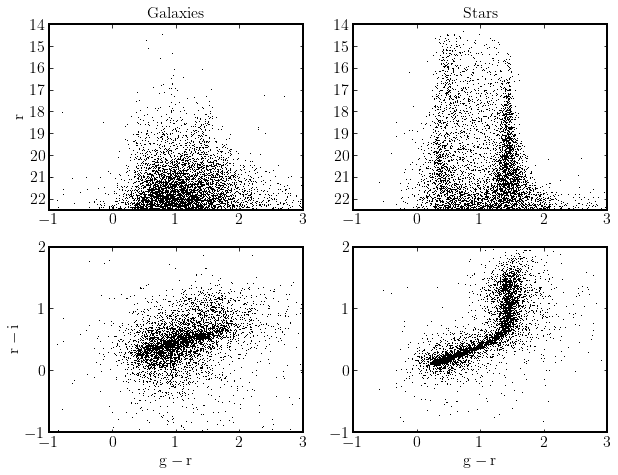

In [44]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_imaging_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)


def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample()

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies


def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none', marker=',')

    fig = plt.figure(figsize=(10, 7.5))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
plt.show()

### Figure 1.2 from SDMLA

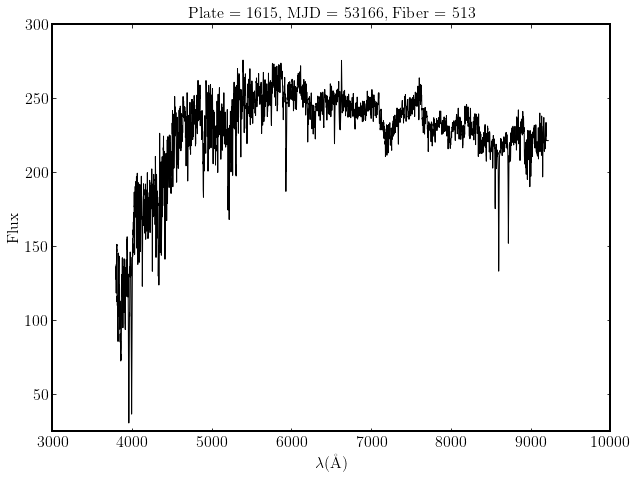

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.plot(spec.wavelength(), spec.spectrum, '-k', lw=1)

ax.set_xlim(3000, 10000)
ax.set_ylim(25, 300)

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel('Flux')
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

plt.show()

### Figure 1.15 from SDMLA

[========================================]  24.01Mb / 24.01Mb   


/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/Users/martini.10/anaconda3/lib/python3.8/site-packages/

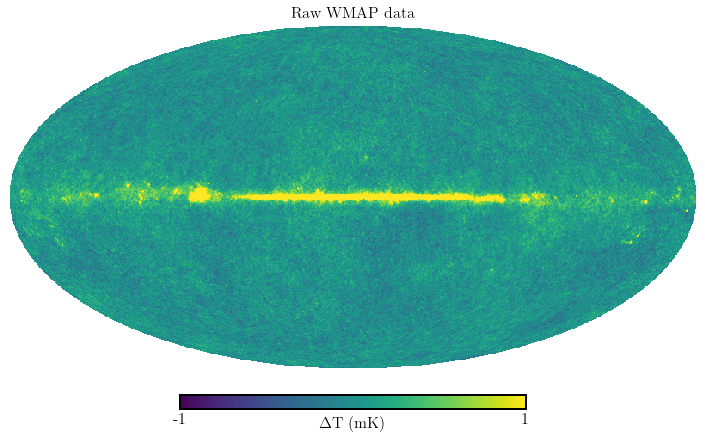

In [45]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
# warning: due to a bug in healpy, importing it before pylab can cause
#  a segmentation fault in some circumstances.
import healpy as hp

from astroML.datasets import fetch_wmap_temperatures

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

#------------------------------------------------------------
# Next plot the wmap pixellization
wmap_unmasked = fetch_wmap_temperatures(masked=False)

# plot the unmasked map
fig = plt.figure(2, figsize=(10, 7.5))
hp.mollview(wmap_unmasked, min=-1, max=1, title='Raw WMAP data',
            unit=r'$\Delta$T (mK)', fig=2)
fig.axes[1].texts[0].set_fontsize(16)

plt.show()

### Illustrate a few different NSIDE values

/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/martini.10/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be

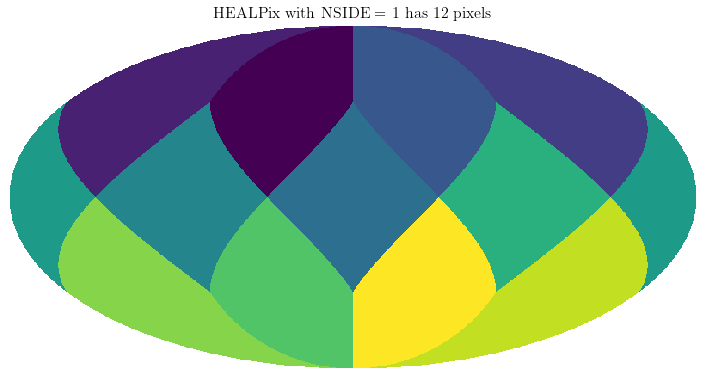

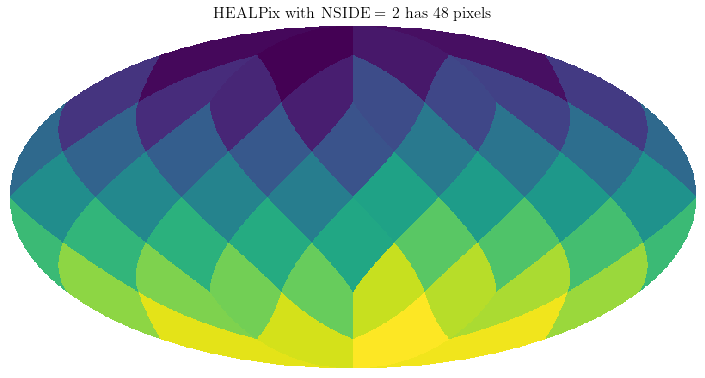

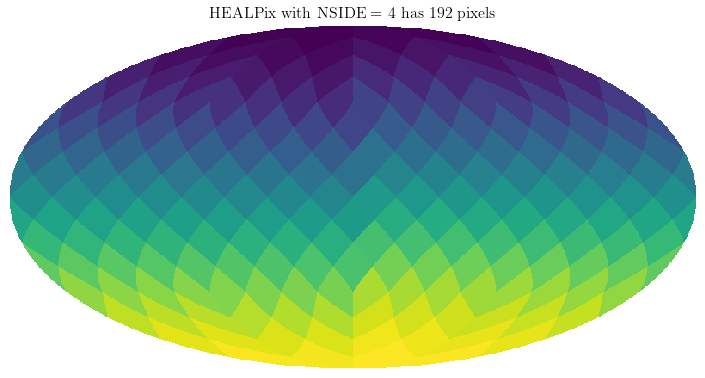

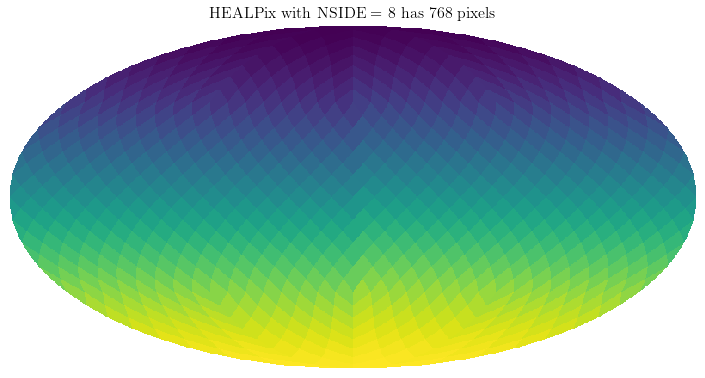

In [47]:
nsides = np.power(2, np.arange(4))

#fig, axarr = plt.subplots(len(nsides), 1, figsize=(3*len(nsides),7))

# Prepare the healpix pixels
for i, nside in enumerate(nsides): 
    m = np.arange(hp.nside2npix(nside))

    # Plot the pixelization
    fig = plt.figure(i, figsize=(10, 7.5))
    label = "HEALPix with NSIDE = {0} has {1} pixels".format(nside, len(m))
    hp.mollview(m, nest=False, title=label, fig=i)

    # remove colorbar: we don't need it for this plot
    fig.delaxes(fig.axes[1])

In [49]:
# What is the pixel size for NSIDE = 64? 
NSIDE = 64
print("Approximate resolution at NSIDE {} is {:.2} deg (per side)".format(
    NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60) )


Approximate resolution at NSIDE 64 is 0.92 deg (per side)
